# Financial Stability of African Countries between 1860 to 2014

Dataset description : This dataset focuses on the Banking, Debt, Financial, Inflation, and Systemic Crises that occurred, from 1860 to 2014, in 13 African countries, including Algeria, Angola, Central African Republic, Ivory Coast, Egypt, Kenya, Mauritius, Morocco, Nigeria, South Africa, Tunisia, Zambia and Zimbabwe. The ML model's objective is to predict the likelihood of a Systemic crisis emergence given a set of indicators like the annual inflation rates.

The columns in our dataset:

* country number - Denotes a specific country;
* country code - Three letter country code;
* country - The name of the country;
* year - The year of the observation;
* systemic_crisis - (A (systemic) banking crisis occurs when many banks in a country are in serious solvency or liquidity problems at the same time) “0” means that no systemic crisis occurred in the year and “1” means that a systemic crisis occurred in the year;
* exch_usd - The exchange rate of the country vis-a-vis the USD;
* domestic_debt_in_default - “0” means that no sovereign domestic debt default occurred in the year and “1” means that a sovereign domestic debt default occurred in the year;
* sovereign_external_debt_default - “0” means that no sovereign external debt default occurred in the year and “1” means that a sovereign external debt default occurred in the year;
* gdp_weighted_default - The total debt in default vis-a-vis the GDP;
* inflation_annual_cpi - The annual CPI Inflation rate;
* independence - “0” means “no independence” and “1” means “independence”;
* currency_crises - “0” means that no currency crisis occurred in the year and “1” means that a currency crisis occurred in the year;
* inflation_crises - “0” means that no inflation crisis occurred in the year and “1” means that an inflation crisis occurred in the year;
* banking_crisis - “no_crisis” means that no banking crisis occurred in the year and “crisis” means that a banking crisis occurred in the year;

### Step 1: Import libraries and load dataset

In [270]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from ydata_profiling import ProfileReport
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

%matplotlib inline

In [271]:
# Load dataset
banking_df = pd.read_csv('datasets/African_crises_dataset.csv')
banking_df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


In [272]:
profile = ProfileReport(banking_df, title='Banking Crisis Report in Africa (1870-2014)')
#profile.to_file(output_file='profile-report.html')

In [273]:
banking_df.shape

(1059, 14)

In [274]:
banking_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 14 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   country_code                     1059 non-null   object 
 2   country                          1059 non-null   object 
 3   year                             1059 non-null   int64  
 4   systemic_crisis                  1059 non-null   int64  
 5   exch_usd                         1059 non-null   float64
 6   domestic_debt_in_default         1059 non-null   int64  
 7   sovereign_external_debt_default  1059 non-null   int64  
 8   gdp_weighted_default             1059 non-null   float64
 9   inflation_annual_cpi             1059 non-null   float64
 10  independence                     1059 non-null   int64  
 11  currency_crises                  1059 non-null   int64  
 12  inflation_crises    

In [275]:
banking_df.describe(include='all')

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
count,1059.000000,1059,1059,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1059.000000,1.059000e+03,1059.000000,1059.000000,1059.000000,1059
unique,NaN,13,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,EGY,Egypt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,no_crisis
freq,NaN,155,155,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,965
mean,35.613787,NaN,NaN,1967.767705,0.077432,43.140831,0.039660,0.152975,0.006402,2.084889e+04,0.776204,0.132200,0.129367,NaN
std,23.692402,NaN,NaN,33.530632,0.267401,111.475380,0.195251,0.360133,0.043572,6.757274e+05,0.416984,0.349847,0.335765,NaN
min,1.000000,NaN,NaN,1860.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.850214e+01,0.000000,0.000000,0.000000,NaN
25%,15.000000,NaN,NaN,1951.000000,0.000000,0.195350,0.000000,0.000000,0.000000,2.086162e+00,1.000000,0.000000,0.000000,NaN
50%,38.000000,NaN,NaN,1973.000000,0.000000,0.868400,0.000000,0.000000,0.000000,5.762330e+00,1.000000,0.000000,0.000000,NaN
75%,56.000000,NaN,NaN,1994.000000,0.000000,8.462750,0.000000,0.000000,0.000000,1.164405e+01,1.000000,0.000000,0.000000,NaN


In [276]:
banking_df.isnull().sum()

country_number                     0
country_code                       0
country                            0
year                               0
systemic_crisis                    0
exch_usd                           0
domestic_debt_in_default           0
sovereign_external_debt_default    0
gdp_weighted_default               0
inflation_annual_cpi               0
independence                       0
currency_crises                    0
inflation_crises                   0
banking_crisis                     0
dtype: int64

In [277]:
banking_df.duplicated().sum()

np.int64(0)

From the quick overview of the data we can deduce that:

* There are 1059 rows and 14 columns in the dataset. 
* Only the country_code, country and banking_crisis columns are categorical
* There isn't any missing values in the dataset
* There isn't any duplicated value
* There are 13 unique countries whose data was collected from 1860 to 2014

Since our datastet doesn't contain any missing values or duplicates, we can proceed to the feature selection & engineering

### Step 2 : Data Exploration and Analysis

#### 2.1 How many yearly systemic crisises have occurred per country?

In [278]:
grouped_sys_crisis_df = banking_df.groupby(['country'])['systemic_crisis'].sum().reset_index()
grouped_sys_crisis_df = grouped_sys_crisis_df.sort_values(by='systemic_crisis',ascending=False)

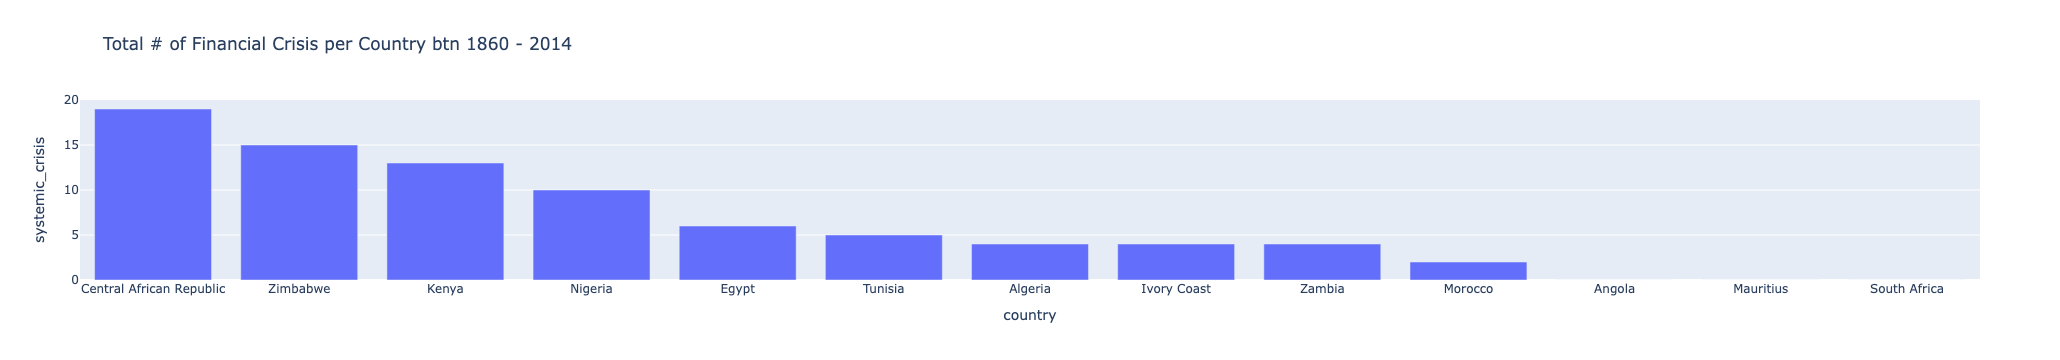

In [279]:
fig = px.bar(grouped_sys_crisis_df, x = 'country', y='systemic_crisis', title='Total # of Financial Crisis per Country btn 1860 - 2014')
fig.show()

Central African Republic has had the most financial crisis over the period with Zimbabwe and Kenya making up the top 3 countries with the biggest financial crisis

#### 2.2 Which country had the highest annual CPI Inflation rate? What was the inflation rate?

In [280]:
inflation_rate_df = banking_df.sort_values(by='inflation_annual_cpi', ascending=False)
inflation_rate_df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
1053,70,ZWE,Zimbabwe,2008,1,2.000000e-03,1,1,0.0,2.198970e+07,1,1,1,crisis
1052,70,ZWE,Zimbabwe,2007,1,1.900000e-16,1,1,0.0,6.627989e+04,1,1,1,crisis
143,2,AGO,Angola,1996,0,2.019940e-01,1,1,0.0,4.146010e+03,1,1,1,crisis
142,2,AGO,Angola,1995,0,5.692000e-03,1,1,0.0,2.672230e+03,1,2,1,crisis
140,2,AGO,Angola,1993,0,6.500000e-06,1,1,0.0,1.379476e+03,1,1,1,crisis


Zimbabwe had the highest inflation rate between 2007 - 2008 at 6.62 and 2.19 respectively

#### 2.3 In what year did Kenya have its first systemic banking crisis?

In [281]:
banking_df[banking_df.country == 'Kenya'].sort_values(by='banking_crisis', ascending=True).head(10)

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
475,35,KEN,Kenya,1985,1,16.2843,0,0,0.0,11.398000,1,0,0,crisis
476,35,KEN,Kenya,1986,1,16.0422,0,0,0.0,10.284000,1,0,0,crisis
477,35,KEN,Kenya,1987,1,16.5149,0,0,0.0,13.007000,1,0,0,crisis
478,35,KEN,Kenya,1988,1,18.5994,0,0,0.0,4.804000,1,0,0,crisis
482,35,KEN,Kenya,1992,1,36.2163,0,0,0.0,27.332000,1,1,1,crisis
483,35,KEN,Kenya,1993,1,68.1631,0,0,0.0,45.979000,1,1,1,crisis
484,35,KEN,Kenya,1994,1,44.8389,0,1,0.0,28.814000,1,0,1,crisis
485,35,KEN,Kenya,1995,1,55.9389,0,1,0.0,1.554000,1,0,0,crisis
438,35,KEN,Kenya,1948,0,4.9582,0,0,0.0,9.339831,0,0,0,no_crisis
473,35,KEN,Kenya,1983,0,13.7959,0,0,0.0,11.603000,1,0,0,no_crisis


Kenya had it's first systemic bank crisis in 1985. It lasted for a decade from 1985 to 1995

### Step 3: Feature Selection & Engineering

In [282]:
banking_df.head()

,country_number,country_code,country,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,DZA,Algeria,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,crisis
1,1,DZA,Algeria,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,no_crisis
2,1,DZA,Algeria,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,no_crisis
3,1,DZA,Algeria,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,no_crisis
4,1,DZA,Algeria,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,no_crisis


#### 3.1 Encoding the banking crisis feature

In [283]:
le = LabelEncoder()
banking_df.banking_crisis = le.fit_transform(banking_df.banking_crisis)
banking_df.banking_crisis.unique()

array([0, 1])

#### 3.2 Dropping identical columns

In [296]:
# Checking the country columns
banking_df.country_number.nunique(), banking_df.country_number.unique()

(13, array([ 1,  2, 10, 15, 19, 35, 38, 40, 45, 56, 63, 69, 70]))

The country_number, country_code and country all define a particular country, therefore we can remove 2 and retain one. Since the country_number column is already numerical, we'll remove the country_code and country. This will negate the need to encode the data during the training step of our data.

In [324]:
selected_df = banking_df.copy()
selected_df = selected_df.drop(['country_code', 'country'], axis=1)

In [325]:
selected_df.head()

,country_number,year,systemic_crisis,exch_usd,domestic_debt_in_default,sovereign_external_debt_default,gdp_weighted_default,inflation_annual_cpi,independence,currency_crises,inflation_crises,banking_crisis
0,1,1870,1,0.052264,0,0,0.0,3.441456,0,0,0,0
1,1,1871,0,0.052798,0,0,0.0,14.149140,0,0,0,1
2,1,1872,0,0.052274,0,0,0.0,-3.718593,0,0,0,1
3,1,1873,0,0.051680,0,0,0.0,11.203897,0,0,0,1
4,1,1874,0,0.051308,0,0,0.0,-3.848561,0,0,0,1


In [326]:
# Check the systemic crisis and banking crisis columns
selected_df.systemic_crisis.nunique(), selected_df.systemic_crisis.unique()

(2, array([1, 0]))

In [327]:
selected_df.banking_crisis.nunique(), selected_df.banking_crisis.unique()

(2, array([0, 1]))

The systematic and banking crisis columns represent the risk factor of a country being at risk to its financial stability. However, we need to investigate whether they're usually correlated ie when a country has a systemic_crisis of 1 does it directly correlate with a banking crisis?

In [328]:
selected_df[selected_df['banking_crisis'] == selected_df['systemic_crisis']].shape

(24, 12)

In [329]:
selected_df.shape

(1059, 12)

There are only 24 occurrences where the systemic crisis directly affected the banking crisis ie when systemic crisis was 1, it lead to a banking crisis (crisis or 1). Therefore, the 2 columns aren't identical

In [330]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   year                             1059 non-null   int64  
 2   systemic_crisis                  1059 non-null   int64  
 3   exch_usd                         1059 non-null   float64
 4   domestic_debt_in_default         1059 non-null   int64  
 5   sovereign_external_debt_default  1059 non-null   int64  
 6   gdp_weighted_default             1059 non-null   float64
 7   inflation_annual_cpi             1059 non-null   float64
 8   independence                     1059 non-null   int64  
 9   currency_crises                  1059 non-null   int64  
 10  inflation_crises                 1059 non-null   int64  
 11  banking_crisis                   1059 non-null   int64  
dtypes: float64(3), int64

#### 3.3 Checking and handling outliers

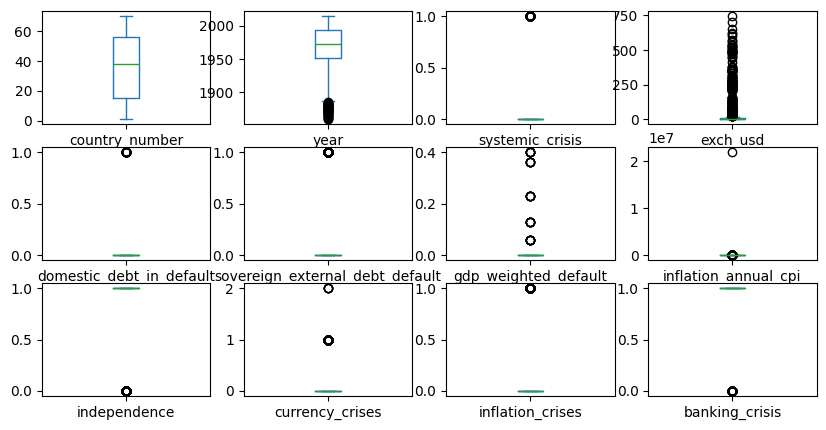

In [331]:
# box plot to visualize outliers
selected_df.plot(kind='box', subplots=True,figsize=(10,5),layout=(3,4))
plt.show()

In [332]:
# Define the lower and upper limits for each column and filter the DataFrame
def filter_outliers(df, lower_percentile=0.1, upper_percentile=0.95):
    df_filtered = df.copy()  # Make a copy of the DataFrame
    
    for column in df.columns:
        # Calculate the lower and upper limits for the column
        lower_limit = df[column].quantile(lower_percentile)
        upper_limit = df[column].quantile(upper_percentile)
        
        # Apply filtering using the calculated limits
        df_filtered = df_filtered.loc[(df_filtered[column] >= lower_limit) & (df_filtered[column] <= upper_limit)]
    
    return df_filtered

In [333]:
# Let's handle outliers using a capping of the 10th and 95th percentiles for the year, exch_usd, systemic_crisis, inflation_annual_cpi,independence, currency_crises and banking_crisis features
#columns = ['year', 'exch_usd', 'gdp_weighted_default', 'inflation_annual_cpi', 'independence', 'currency_crises', 'inflation_crises', 'banking_crisis']
#selected_df[columns] = filter_outliers(selected_df[columns])

In [334]:
selected_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1059 entries, 0 to 1058
Data columns (total 12 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   country_number                   1059 non-null   int64  
 1   year                             1059 non-null   int64  
 2   systemic_crisis                  1059 non-null   int64  
 3   exch_usd                         1059 non-null   float64
 4   domestic_debt_in_default         1059 non-null   int64  
 5   sovereign_external_debt_default  1059 non-null   int64  
 6   gdp_weighted_default             1059 non-null   float64
 7   inflation_annual_cpi             1059 non-null   float64
 8   independence                     1059 non-null   int64  
 9   currency_crises                  1059 non-null   int64  
 10  inflation_crises                 1059 non-null   int64  
 11  banking_crisis                   1059 non-null   int64  
dtypes: float64(3), int64

#### 3.3 Generate a correlation matrix

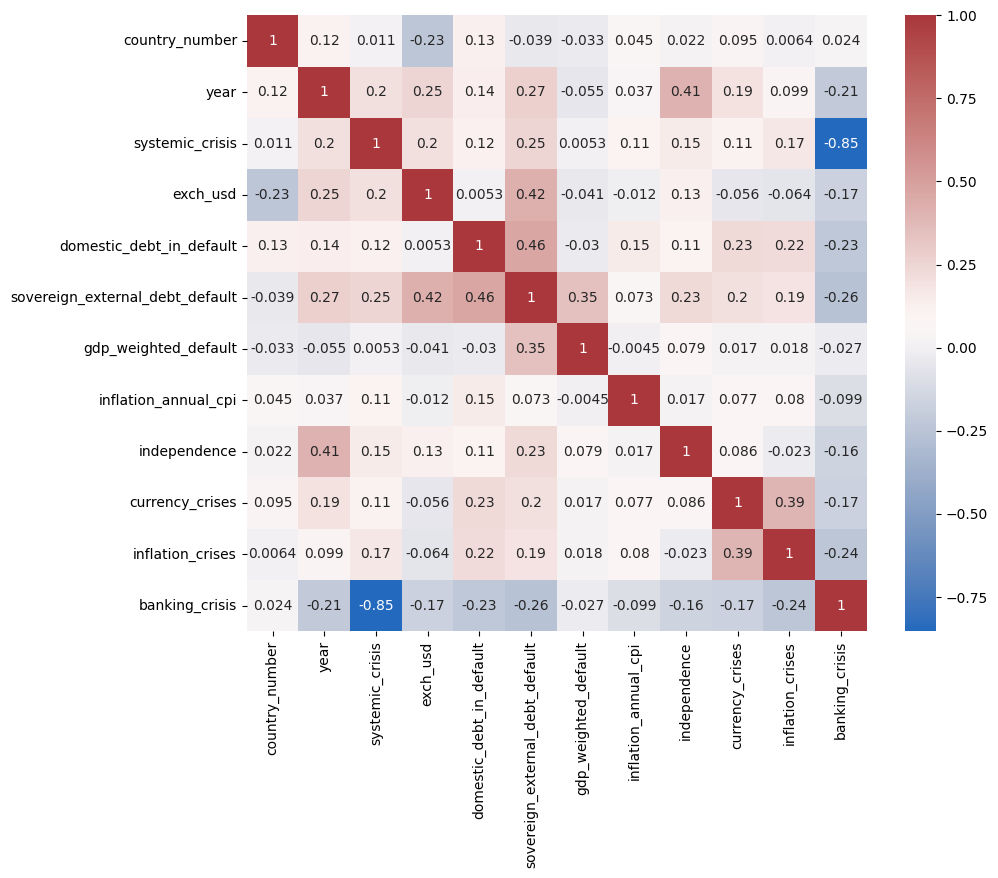

In [335]:
plt.figure(figsize=(10,8))
sns.heatmap(data=selected_df.corr(), annot=True, cmap='vlag')
plt.show()

Interpretation:

From the correlation matrix, we can deduce that:

* The systemic_crisis had a very strong weak correlation to the banking_crisis meaning that a positive change in systemic crisis lead to an opposite result on the banking crisis
* The year, exchange rate and sovereign external debt default had greater positive correlations of 0.2 and above on the systemic crisis compared to the other features

Since we want to predict the systemic_crisis of a country, we can use the year, exchange rate (exch_usd), sovereign debt default (sovereign_external_debt_default), inflation_annual_cpi, inflation_crises etc and banking_crisis features to tune our model.

### Step 4: Training our Model

We'll train our model without the handled outliers to see how it performs

#### 4.1 Selecting out target and features

In [336]:
X = selected_df.drop(['systemic_crisis'], axis = 1)
y = selected_df.systemic_crisis

#### 4.2 Splitting our dataset using train_test_split

In [337]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [338]:
# Training our model
model = LogisticRegression()
model.fit(X_train, y_train)

/Users/macy/.virtual-envs/ml-venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [339]:
# Running predictions
y_pred = model.predict(X_test)

In [340]:
# Checking actual vs prediction values
pred_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})
pred_df.head(15)

,Actual,Predicted
576,0,0
312,0,0
70,0,0
682,0,0
896,0,0
912,0,0
308,0,0
660,0,0
174,0,0
192,0,0


In [341]:
accuracy = model.score(X_test, y_test)
print("Accuracy={:.2f}".format(accuracy))

Accuracy=0.99


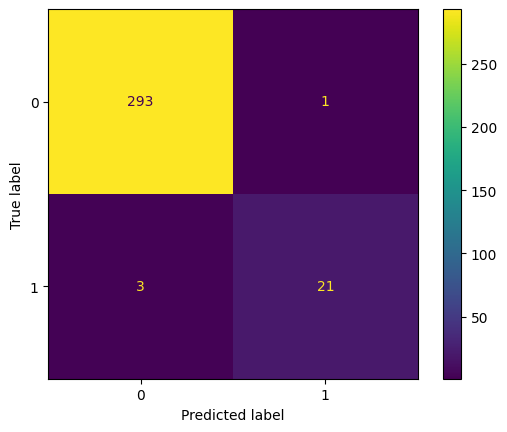

In [342]:
# Confusion matrix
cmx = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(confusion_matrix = cmx, display_labels = [0, 1]).plot()

* True Negative (Top-Left Quadrant) (293)
* False Positive (Top-Right Quadrant) (1)
* False Negative (Bottom-Left Quadrant) (3)
* True Positive (Bottom-Right Quadrant) (21)

* True means that the values were accurately predicted, False means that there was an error or wrong prediction.

Our model correctly predicts instances where the systemic_crisis marked as "0" 293 times with only 1 predicted instance going against the actual. It also correctly predicts the systemic_crisis marked as "1" 21 times with only 3 instances identifying them as correct when they were wrong

In [343]:
# Classification report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       294
           1       0.95      0.88      0.91        24

    accuracy                           0.99       318
   macro avg       0.97      0.94      0.95       318
weighted avg       0.99      0.99      0.99       318



Precision - ratio of true positivies to the total number of predicted positives and measures the accuracy of the positive predictions made by the mode
Recall - the ratio of true positives to the total number of actual positives. It measures the ability of the model to correctly identify positive samples.
F1 score - the harmonic mean of precision and recall, and it provides a balanced measure of the model's performance.

Our model has an f1-score of 0.99 which means it's performing extremely well and predicts whether a country will get a systemic crisis 99% of all times

#### 4.3 Training our dataset using cross validation (k-fold)

In [344]:
kf = KFold(n_splits = 10, random_state=42, shuffle=True)

In [345]:
scores = cross_val_score(model, X, y, scoring='accuracy', cv=kf, n_jobs=-1)

/Users/macy/.virtual-envs/ml-venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/macy/.virtual-envs/ml-venv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

In [346]:
# report performance
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy: 0.975 (0.013)


Using the cross validation algorithm returns a 0.975 accuracy on our model hence our model seems to be performing well